# Train Library Loading Concentration Prediction Algorithm
This Notebook Trains The Library Loading Concentration Tool.

In [ ]:
cd ../

In [1]:
import pandas as pd
from IPython.display import display
import os,glob
import numpy as np

#Peak Detection
from scipy.signal import find_peaks_cwt
from scipy.interpolate import interp1d
from scipy.integrate import quad
import peakutils

#Fourier Transforms
from scipy.fftpack import irfft,rfft
from scipy.interpolate import approximate_taylor_polynomial

#Machine Learning
from tpot import TPOTRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

test=False

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
os.listdir('data')

#Get Unique ID Strings
unique_file_ids = []
for file_str in os.listdir('data'):
    if file_str[0] != '.':
        unique_file_ids.append('_'.join(file_str.split('_')[:-1]))
unique_file_ids = list(set(unique_file_ids))
#print(unique_file_ids,len(unique_file_ids))
os.chdir('data')

In [3]:
print(unique_file_ids)
print(len(unique_file_ids))

['', 'NK_582018_High Sensitivity DNA Assay_DE24802700_2018-05-08_10-45-03', 'NK_JLC_NEXTERA1_High Sensitivity DNA Assay_DE24802700_2017-02-02_14-30-54', 'nextera4_jlc_High Sensitivity DNA Assay_DE24802700_2016-11-10_11-15-46', 'nextera_jlc_High Sensitivity DNA Assay_DE24802700_2018-06-06_12-15-19', 'nextera11_jlc_High Sensitivity DNA Assay_DE24802700_2017-07-26_15-45-18', '20180710_JD_NK_High Sensitivity DNA Assay_DE24802700_2018-07-10_15-44-55', 'NK_20170918_High Sensitivity DNA Assay_DE24802700_2017-09-18_10-28-44', 'Ggoyal_High Sensitivity DNA Assay_DE24802700_2018-02-06_13-10-41', 'nextera_jlc_High Sensitivity DNA Assay_DE24802700_2018-01-10_12-11-58', 'NexteraRPT_jlc_High Sensitivity DNA Assay_DE24802700_2016-08-25_11-16-11', 'JAM,_JLC_High Sensitivity DNA Assay_DE24802700_2017-09-06_14-50-13', 'ggoyal_High Sensitivity DNA Assay_DE24802700_2017-12-18_11-08-52', 'nk_03_06_2018_High Sensitivity DNA Assay_DE24802700_2018-03-06_15-11-01', 'nextera_JLC_High Sensitivity DNA Assay_DE2480

/Users/zak/Projects/clusterDensityPrediction/utility.py:19: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.7/site-packages

testing!


<Figure size 432x288 with 0 Axes>

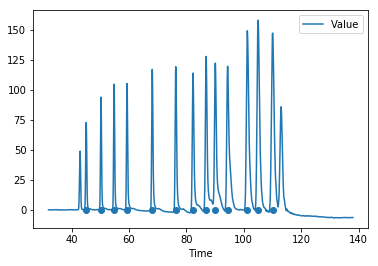

15 13
13 13


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


testing!


<Figure size 432x288 with 0 Axes>

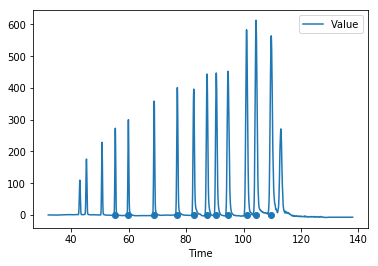

13 13
11 13
testing!


<Figure size 432x288 with 0 Axes>

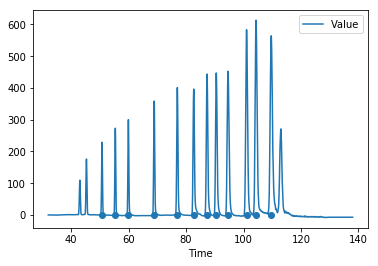

14 13
12 13
testing!


<Figure size 432x288 with 0 Axes>

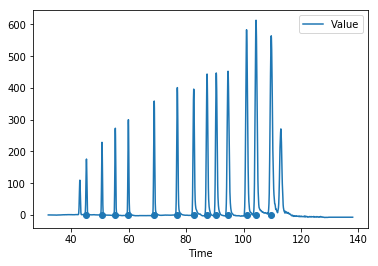

15 13
13 13
testing!


<Figure size 432x288 with 0 Axes>

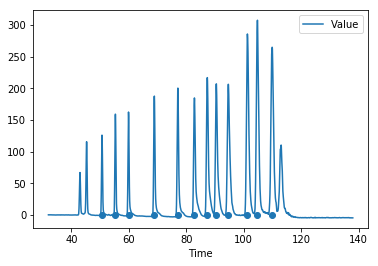

14 13
12 13
testing!


<Figure size 432x288 with 0 Axes>

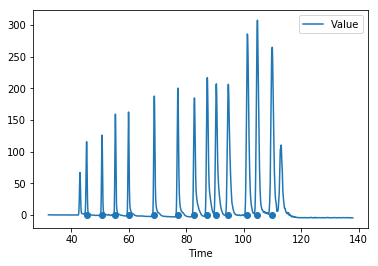

15 13
13 13
testing!


<Figure size 432x288 with 0 Axes>

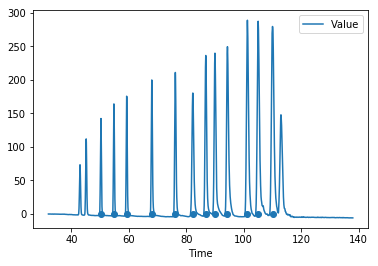

14 13
12 13
testing!


<Figure size 432x288 with 0 Axes>

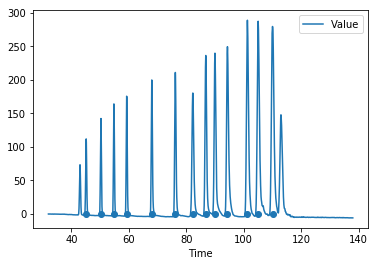

15 13
13 13
testing!


<Figure size 432x288 with 0 Axes>

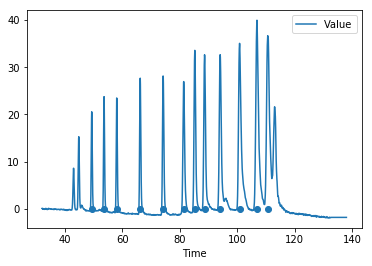

14 13
12 13
testing!


<Figure size 432x288 with 0 Axes>

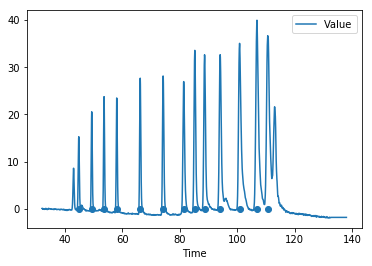

15 13
13 13
testing!


<Figure size 432x288 with 0 Axes>

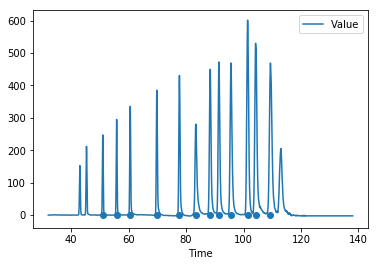

14 13
12 13
testing!


<Figure size 432x288 with 0 Axes>

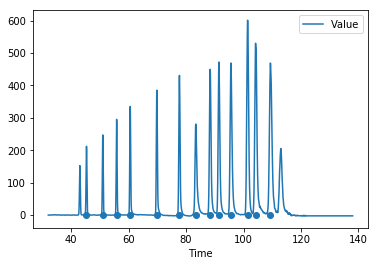

15 13
13 13
testing!


<Figure size 432x288 with 0 Axes>

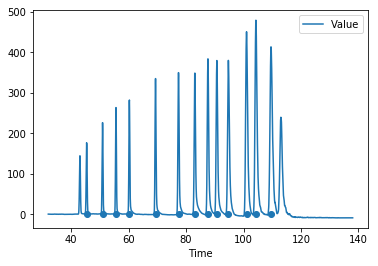

15 13
13 13
testing!


<Figure size 432x288 with 0 Axes>

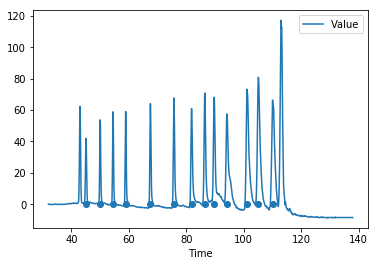

15 13
13 13
testing!


<Figure size 432x288 with 0 Axes>

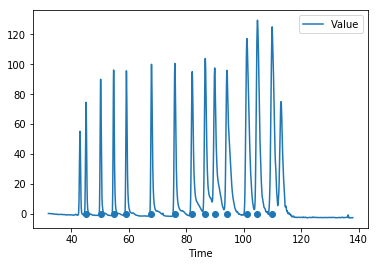

15 13
13 13
testing!


<Figure size 432x288 with 0 Axes>

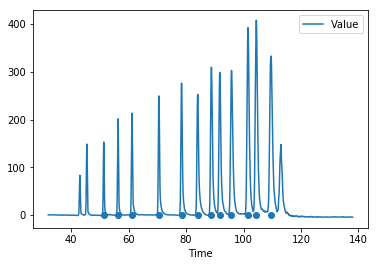

14 13
12 13
testing!


<Figure size 432x288 with 0 Axes>

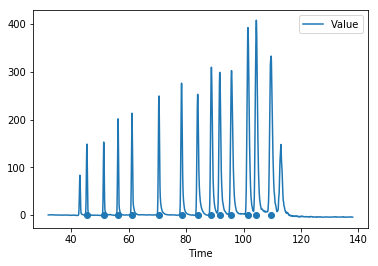

15 13
13 13
testing!


<Figure size 432x288 with 0 Axes>

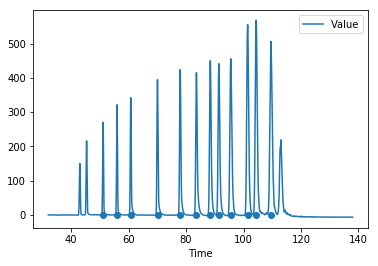

14 13
12 13
testing!


<Figure size 432x288 with 0 Axes>

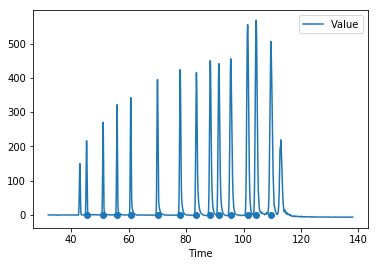

15 13
13 13
testing!


<Figure size 432x288 with 0 Axes>

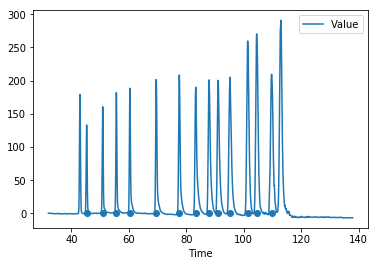

15 13
13 13
testing!


<Figure size 432x288 with 0 Axes>

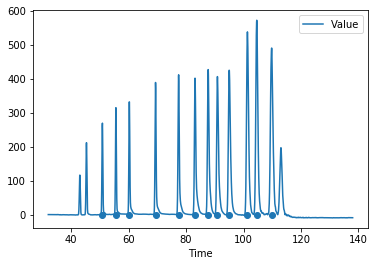

14 13
12 13
testing!


<Figure size 432x288 with 0 Axes>

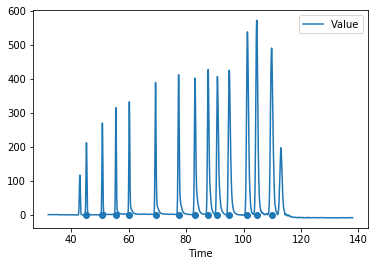

15 13
13 13
testing!


<Figure size 432x288 with 0 Axes>

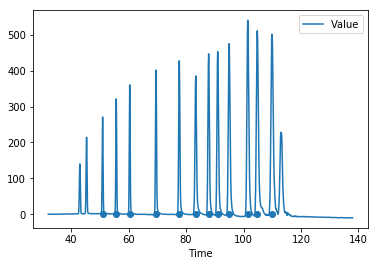

14 13
12 13
testing!


<Figure size 432x288 with 0 Axes>

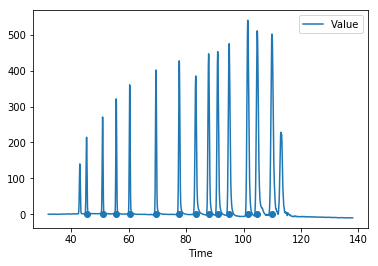

15 13
13 13
testing!


<Figure size 432x288 with 0 Axes>

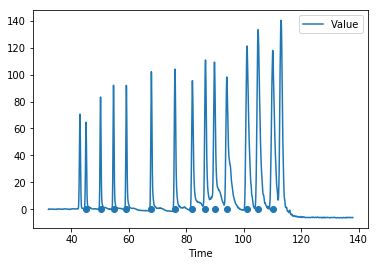

15 13
13 13
testing!


<Figure size 432x288 with 0 Axes>

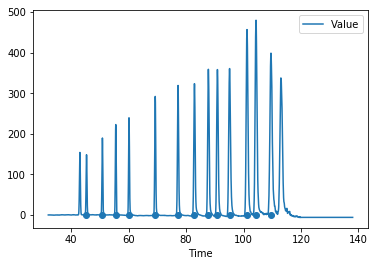

15 13
13 13
testing!


<Figure size 432x288 with 0 Axes>

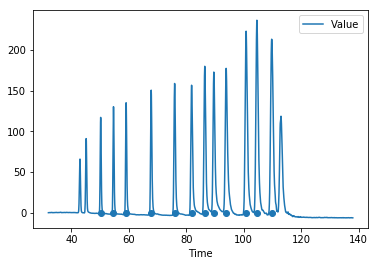

14 13
12 13
testing!


<Figure size 432x288 with 0 Axes>

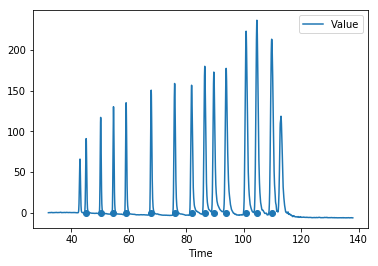

15 13
13 13
testing!


<Figure size 432x288 with 0 Axes>

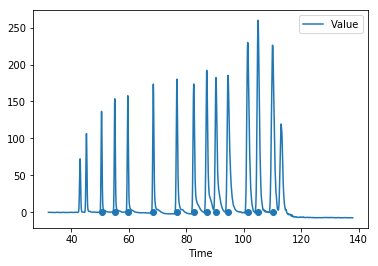

14 13
12 13
testing!


<Figure size 432x288 with 0 Axes>

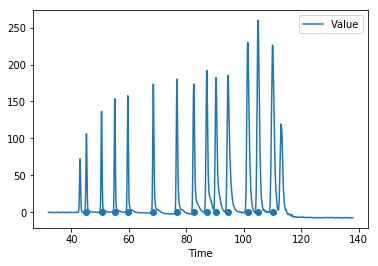

15 13
13 13
testing!


<Figure size 432x288 with 0 Axes>

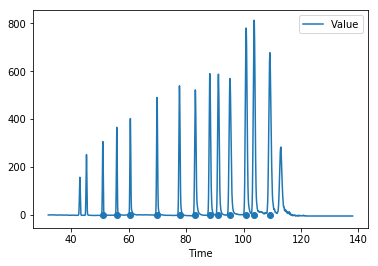

14 13
12 13
testing!


<Figure size 432x288 with 0 Axes>

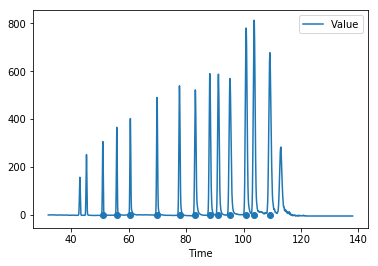

14 13
12 13
testing!


<Figure size 432x288 with 0 Axes>

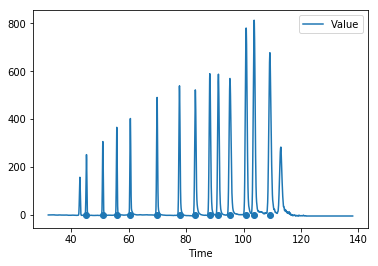

15 13
13 13
testing!


<Figure size 432x288 with 0 Axes>

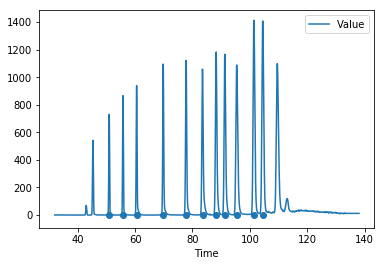

13 13
11 13
testing!


<Figure size 432x288 with 0 Axes>

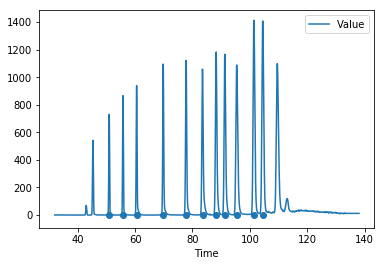

13 13
11 13
testing!


<Figure size 432x288 with 0 Axes>

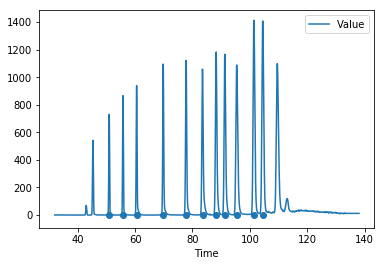

13 13
11 13
testing!


<Figure size 432x288 with 0 Axes>

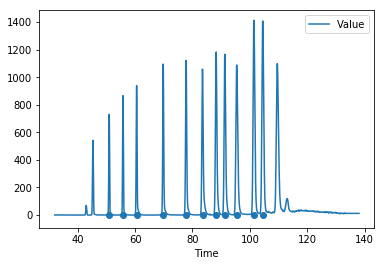

13 13
11 13
testing!


<Figure size 432x288 with 0 Axes>

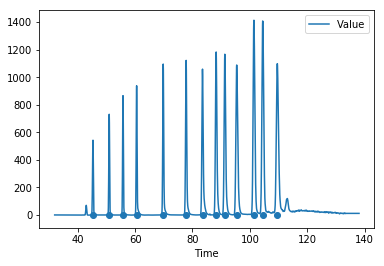

15 13
13 13
testing!


<Figure size 432x288 with 0 Axes>

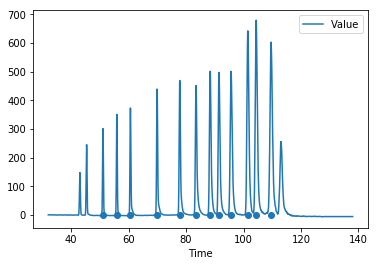

14 13
12 13
testing!


<Figure size 432x288 with 0 Axes>

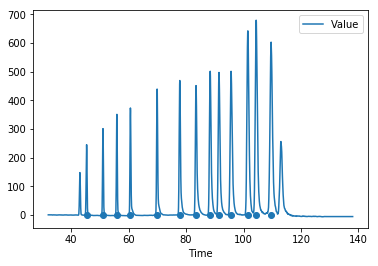

15 13
13 13


/usr/local/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


testing!


<Figure size 432x288 with 0 Axes>

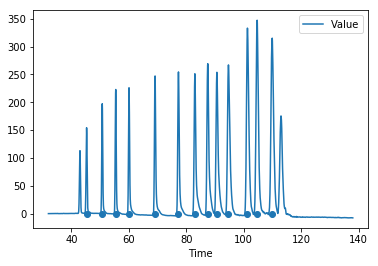

15 13
13 13
testing!


<Figure size 432x288 with 0 Axes>

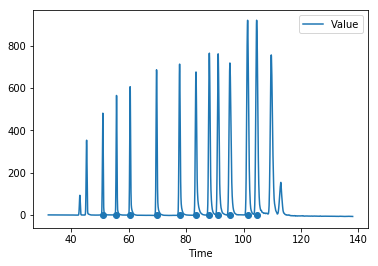

13 13
11 13
testing!


<Figure size 432x288 with 0 Axes>

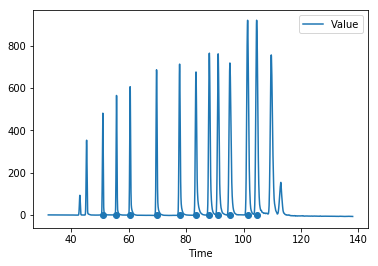

13 13
11 13
testing!


<Figure size 432x288 with 0 Axes>

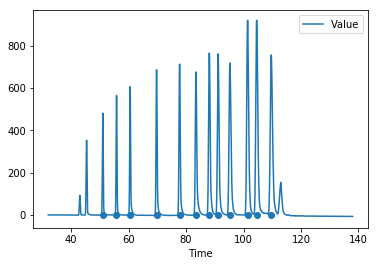

14 13
12 13
testing!


<Figure size 432x288 with 0 Axes>

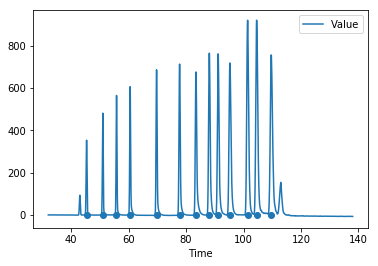

15 13
13 13
testing!


<Figure size 432x288 with 0 Axes>

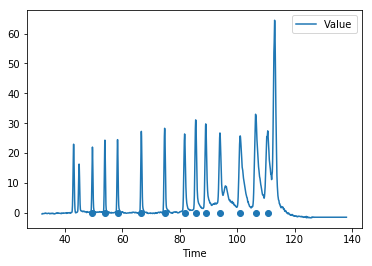

14 13
12 13
testing!


<Figure size 432x288 with 0 Axes>

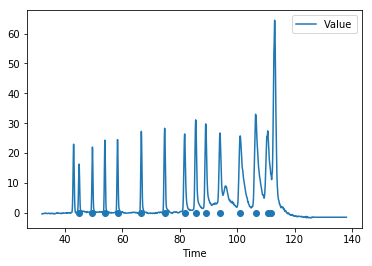

16 13
14 13
testing!


<Figure size 432x288 with 0 Axes>

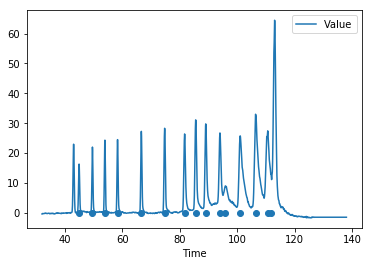

17 13
15 13
testing!


<Figure size 432x288 with 0 Axes>

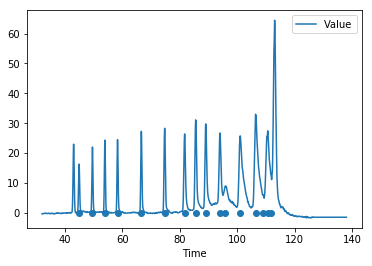

18 13
16 13
testing!


<Figure size 432x288 with 0 Axes>

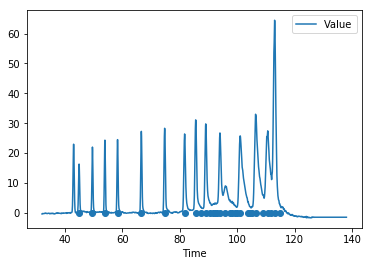

32 13
30 13
peak_not_detected!
testing!


<Figure size 432x288 with 0 Axes>

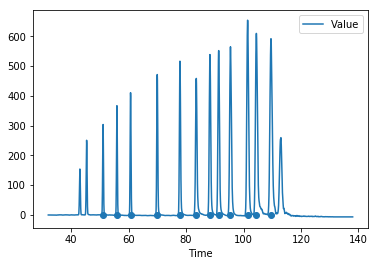

14 13
12 13
testing!


<Figure size 432x288 with 0 Axes>

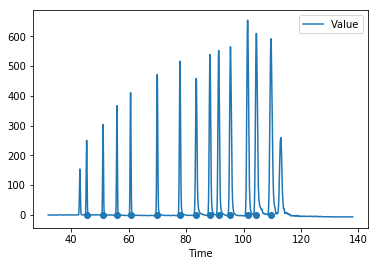

15 13
13 13
testing!


<Figure size 432x288 with 0 Axes>

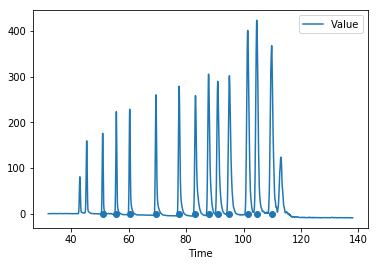

14 13
12 13
testing!


<Figure size 432x288 with 0 Axes>

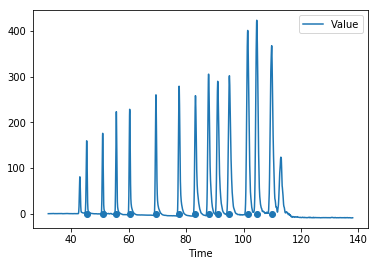

15 13
13 13
testing!


<Figure size 432x288 with 0 Axes>

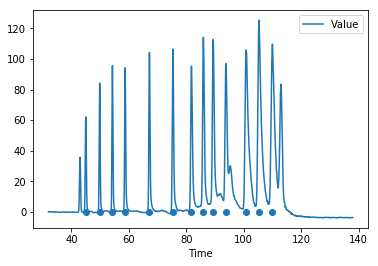

15 13
13 13
testing!


<Figure size 432x288 with 0 Axes>

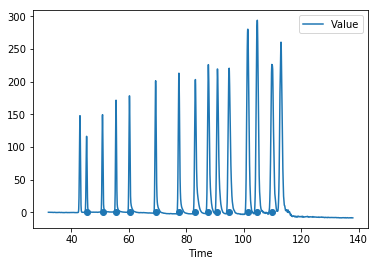

15 13
13 13
testing!


<Figure size 432x288 with 0 Axes>

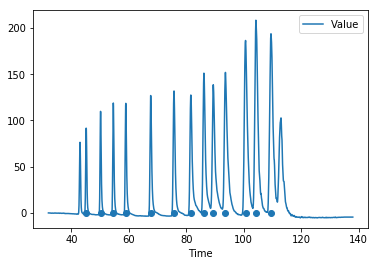

15 13
13 13
testing!


<Figure size 432x288 with 0 Axes>

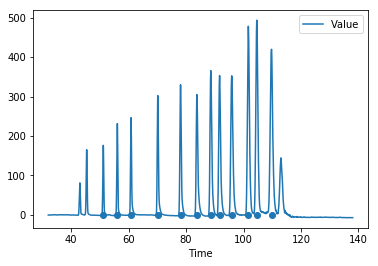

14 13
12 13
testing!


<Figure size 432x288 with 0 Axes>

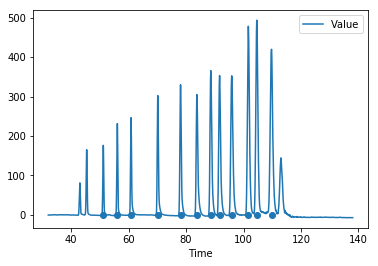

14 13
12 13
testing!


<Figure size 432x288 with 0 Axes>

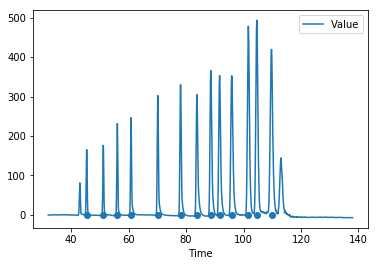

15 13
13 13
29


,Library Loading Concentration,Cluster Density,0,1200,2400,3600,4800,6000,7200,8400,9600,10800
0,9.00,1199.0,0.005068,0.086839,0.163233,0.165949,0.159814,0.142109,0.117200,0.081813,0.053703,0.035959
0,10.00,1228.0,0.092701,0.138394,0.195729,0.170054,0.152942,0.130602,0.088610,0.050384,0.030388,0.000416
0,5.90,1066.0,0.003994,0.065286,0.144223,0.153300,0.157728,0.161617,0.142749,0.099958,0.054054,0.024850
0,9.00,1528.0,0.074042,0.181947,0.179153,0.140280,0.124210,0.106231,0.083350,0.073194,0.054518,0.021650
0,10.00,1640.0,0.000459,0.060522,0.145054,0.120621,0.111297,0.133156,0.176370,0.145073,0.097313,0.070266
0,10.00,716.0,-0.005884,0.133950,0.195443,0.172694,0.146387,0.118280,0.078806,0.064914,0.052873,0.037496
0,10.00,1305.0,-0.032674,0.092251,0.178146,0.164888,0.144460,0.117214,0.095805,0.104262,0.074037,0.008745
0,9.50,1600.0,0.017831,0.100580,0.196133,0.167632,0.134363,0.101642,0.096909,0.107068,0.065858,0.025614
0,5.00,1184.0,0.016753,0.190878,0.231661,0.151533,0.106934,0.076687,0.066466,0.068186,0.046679,0.012637
0,6.30,1335.0,0.046958,0.178072,0.161341,0.130817,0.105018,0.094206,0.093624,0.102974,0.078900,0.077736


In [4]:
def aproximate_sequence(df,n=100,start=0,stop=15000):
    """Aproximate a discrete sequence using a truncated expansion."""
    
    #Create even spacing
    int_lims = np.linspace(start,stop,n+1)
    
    #Create Interpolation function
    abundance_curve = interp1d(df['base pairs'],df['Value'],fill_value='extrapolate')
    
    #Aproximate Function using an integral
    state = [quad(abundance_curve,a,b)[0] for a,b in zip(int_lims[:-1],int_lims[1:])]
    bps = int_lims[:-1]
    
    return state,bps

def extract_features(df):
    pass
    

from utility import find_peaks
#def find_peaks(df,test=False):
#    """Find the peaks of a ladder gel. Return a list of peak times and the 
#    base pairs that correspond to those times.
#    """
#    
#    #display(df)
#    peaks = peakutils.indexes(df['Value'].values, thres=0.15, min_dist=10)
#    #print(peaks)
#    #plt.figure(figsize=(10,10))
#    #df['Value'].plot()
#    #plt.scatter(peaks,np.zeros(len(peaks)))
#    #plt.show()
#    peak_bps = [35,50,150,300,400,500,600,700,1000,2000,3000,7000,10380]
#    peak_times = df['Time'].values[peaks[1:-1]]
#    #print(peak_times)
#    
#    if test:
#        plt.figure()
#        df.plot('Time','Value')
#        plt.scatter(peak_times,np.zeros(len(peak_times)))
#        plt.show()
#        print(len(peaks),len(peak_bps))
#    
#    return peak_times,peak_bps

def normalize_peak(df,start_bp=500,end_bp=11000):
    
    #Subtract out Noise Floor
    noise_floor = np.mean(df['Value'].tail(20))
    df['Value'] -= noise_floor
    df.loc[df['Value']<0,'Value']=0
    
    #Select only important segment
    LIBRARY_SEGMENT = (df['base pairs'] > start_bp) & (df['base pairs'] < end_bp)
    df = df.loc[LIBRARY_SEGMENT]
    
    #Normalize Values to have an area under the curve of 1
    area = np.trapz(df['Value'],x=df['base pairs'])
    df['Value'] /= area
    
    return df

def load_data(file_id):
    """load bioanalyzer data from a set of two csvs. Return a pandas series."""
    #ladder_file = glob.glob(file_id+'_Lad*')
    #print(ladder_file)
    #sample_file = glob.glob(file_id+'_Sam*')
    #print(sample_file)
    
    for file in glob.glob(file_id+'*'):
        #Load Ladder Data first!
        #print(file)
        if 'Ladder' in file:
            ladder_df = pd.read_csv(file,skiprows=17)[:-1]
            ladder_df = ladder_df.apply(np.vectorize(float))
            peak_times,peak_bps = find_peaks(ladder_df,test=True)
            #print(peak_times,peak_bps)
            #print(len(peak_times),len(peak_bps))
            if len(peak_times) != len(peak_bps):
                print('peak_not_detected!')
                return None
            
            time_to_bps = interp1d(peak_times,peak_bps,fill_value='extrapolate',kind='slinear')
            
        #Load Sample Data
        elif 'Sample' in file:
            sample_df = pd.read_csv(file,skiprows=17)[:-2]
            #display(sample_df['Cluster Density (K/mm^2)'])
            if isinstance(sample_df.loc[0,'Cluster Density (K/mm^2)'],str):
                sample_df.loc[0,'Cluster Density (K/mm^2)'] = sample_df.loc[0,'Cluster Density (K/mm^2)'].replace(',','')
            sample_df = sample_df.apply(np.vectorize(float))
    
        
        #plt.scatter(peak_times,peak_bps)
        #plt.plot(np.arange(0,120),np.vectorize(time_to_bps)(np.arange(0,120)))
        #plt.show()
    sample_df['base pairs'] = sample_df['Time'].apply(time_to_bps)
    llc = sample_df['Library Loading Concentration (pM)'].values[0]
    cluster_density = sample_df['Cluster Density (K/mm^2)'].values[0]
    sample_df = sample_df.loc[:,sample_df.columns.isin(['Time','Value','base pairs'])]
    
    #Normalize Peak 
    sample_df = normalize_peak(sample_df)
    
    #Plot Base Pairs Vs Values
    #sample_df['logbp'] = np.log10(sample_df['base pairs'])
    #sample_df.plot('base pairs','Value')
    #plt.show()
    
    #sample_df.plot('logbp','Value')
    #plt.show()
    
    #sample_df.plot('Time','Value')
    #plt.show()
    
    #sample_df.plot('Time','base pairs')
    #plt.show()
    
    #display(sample_df)
    state,bps = aproximate_sequence(sample_df,n=10,stop=12000)    
    
    #Create df
    columns = ['Library Loading Concentration','Cluster Density'] + [str(int(bp)) for bp in bps]
    data = [[llc,cluster_density] + state]
    
    state_df = pd.DataFrame(data,columns=columns)
    
    return state_df
    
    
df = None
for file_id in unique_file_ids: 
    if len(file_id) > 0:
        state_df = load_data(file_id)
        if state_df is not None:
            if df is None:
                df = state_df
            else:
                df = df.append(state_df)

print(len(df))
display(df)

#display(df.corr(method='pearson', min_periods=1))


# Fit and Evaluate Machine Learning Models

In [5]:
#Find & Fit Model
X = df.loc[:,df.columns != 'Cluster Density']
y = df['Cluster Density']

#tpot = TPOTRegressor(generations=20, population_size=50, verbosity=2)
#model = tpot.fit(X, y).fitted_pipeline_

#Use a Random Forest Model!
model = RandomForestRegressor().fit(X,y)
feature_df = pd.DataFrame(data=list(zip(list(X.columns),model.feature_importances_)),columns=['Feature','Importance']).set_index('Feature').sort_values('Importance',ascending=False)
display(feature_df)

,Importance
Feature,
9600,0.192436
0,0.144525
7200,0.122281
10800,0.112385
Library Loading Concentration,0.104450
4800,0.091568
3600,0.073439
6000,0.055060
8400,0.051424


In [6]:
#Save out Model
import pickle
with open('../model/model30.pkl','wb') as fp:
    pickle.dump(model,fp)

716.0 1703.0 987.0


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


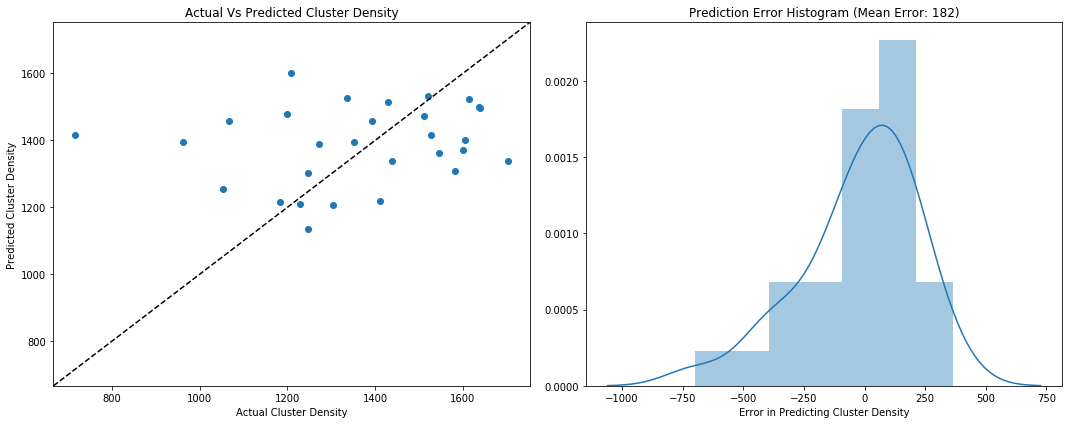

In [7]:
#Plot Cross Validated Predictions
y_p = cross_val_predict(model,X,y)

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.scatter(y,y_p)
axes = plt.gca()
ymin, ymax = axes.get_ylim()
xmin, xmax = axes.get_xlim()
min_val = min(xmin,ymin)
max_val = max(ymax,xmax)
plt.plot([min_val,max_val],[min_val,max_val],'k--')
plt.xlim([min_val,max_val])
plt.ylim([min_val,max_val])
plt.title('Actual Vs Predicted Cluster Density')
plt.xlabel('Actual Cluster Density')
plt.ylabel('Predicted Cluster Density')

plt.subplot(1,2,2)
y_err = [ye -ye_p for ye,ye_p in zip(y,y_p)]
print(min(y),max(y),max(y)-min(y))
sns.distplot(y_err)
plt.title('Prediction Error Histogram (Mean Error: {:0.0f})'.format(np.mean(np.abs(y_err))))
plt.xlabel('Error in Predicting Cluster Density')

plt.tight_layout()

#!pwd

plt.savefig('../figures/ModelAccuracy.pdf',dpi=600)
plt.show()



5.0 13.0


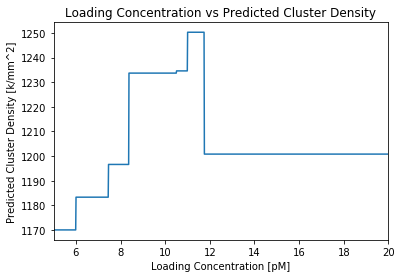

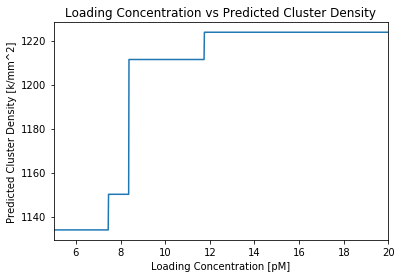

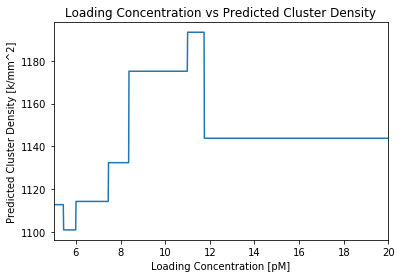

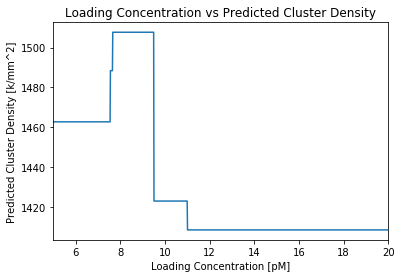

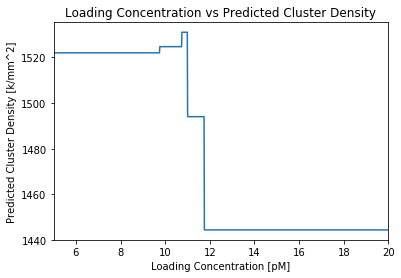

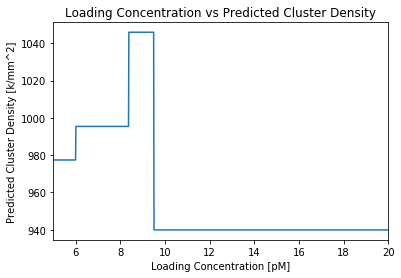

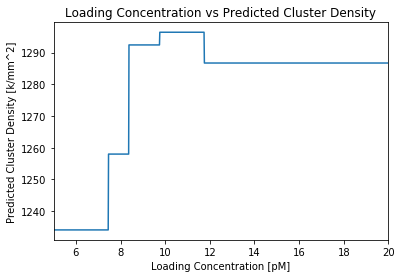

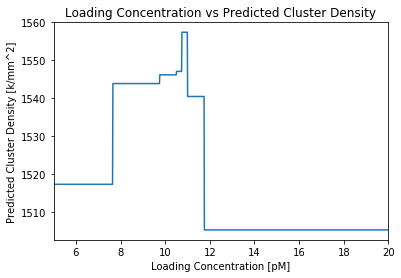

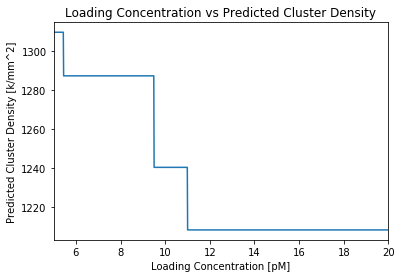

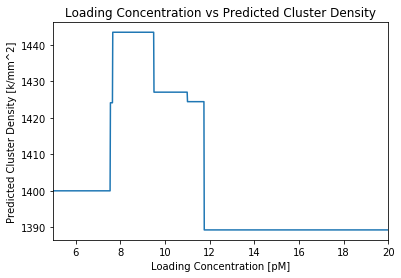

In [8]:
def predict_loading_concentration(spectra,model,low=5,high=20,n=1000):
    cluster_densities = []
    loading_concentrations = np.linspace(low,high,n)
    for lc in loading_concentrations:
        X = np.append(lc,spectra).reshape(1,-1)
        y = model.predict(X)
        cluster_densities.append(y[0])
    
    #print(cluster_densities)
    plt.plot(loading_concentrations,cluster_densities)
    plt.title('Loading Concentration vs Predicted Cluster Density')
    plt.xlabel('Loading Concentration [pM]')
    plt.ylabel('Predicted Cluster Density [k/mm^2]')
    plt.xlim([low,high])
    plt.show()
    
#display(df)

print(min(df['Library Loading Concentration']),max(df['Library Loading Concentration']))
columns = [column for column in df.columns if not column in ['Cluster Density','Library Loading Concentration'] ]
spectra = df[columns].iloc[3].values
#plt.plot(spectra)
#plt.show()

for i in range(10):
    spectra = df[columns].iloc[i].values
    predict_loading_concentration(spectra,model)
